# ELE 435-535 Computation HW2: PCA

### Name: Ricky Lin

### Import required Python packages

In [1]:
# Import additional packages if needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from sklearn import svm

%matplotlib inline

### YALE B Dataset

You will use the YALE B face dataset to explore PCA. The Yale B dataset contains frontal face images (size 192 x 168) of 38 subjects, with around 64 images per subject (not all subjects have the same number of images). The total number of images is 2,414. The images have been column-wise vectorized into 192 x 168 = 32,256 column vectors and stored as the columns of a matrix X. The corresponding 2,414 labels, ranging from 1 to 39 (no 14), are provided in a row vector Y. For background and additional reading, see http://research.microsoft.com/pubs/132810/PAMI-Face.pdf.

### Display Some Images

In [2]:
# This cell is given. You do not need to modify it.

# Functions to represent the image as a matrix or a column vector
def packcw(A):
    return (A.T).reshape(-1,1)

def unpackcw(x,nr):
    return x.reshape(-1,nr).T

\0) Load the YALEBXF.mat face data and display the first image of 38 subjects on a 5 x 8 tile.  
(This part is done as an example) 

Train Data: 32256 x 1520
Test Data: 32256 x 894
(1520,)
(32256, 2414)
(1, 2414)


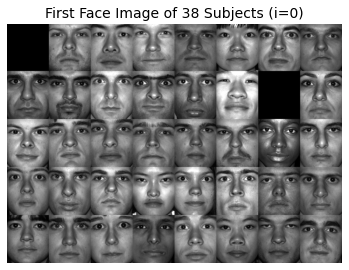

In [3]:
# This cell is given. You do not need to modify it.
# You can reuse this code for other questions below but 
# reference its source: ECE_4/535_codebase_ramadge.

# Load the YALE database
# Train data (X_train): 32256 x 1520 (40 examples for 38 subjects)
# Train label (Y_train): 1520 x 1 (38 subjects (0 ~ 37))
# Test data (X_test): 32256 x 894 (Test examples vary for different subjects)
# Test label (Y_test): 894 x 1 (38 subjects (0 ~ 37))

YALE = io.loadmat('YALEBXF-1.mat') 
X = YALE['X']/255.0
Y = YALE['Y']
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = X.shape[1]  # Total number of examples = 2414

nFc = 38          # Total number of faces
nImg = np.zeros(nFc+2) # Numper of examples for each person
for i in range(nFc+2):
    nImg[i] = (Y==i).sum()

ntr = 40
X_train = np.zeros((dim,nFc*ntr))
Y_train = np.zeros(nFc*ntr)
X_test = np.zeros((dim,nex-nFc*ntr))
Y_test = np.zeros(nex-nFc*ntr)

nImg_eff = nImg[np.where(nImg>0)]
nImg_test = nImg_eff - ntr
for i in range(nFc):
    X_train[:,i*ntr:(i+1)*ntr] = X[:,int(np.sum(nImg_eff[:i])):int(np.sum(nImg_eff[:i]))+40]
    Y_train[i*ntr:(i+1)*ntr] = i
    X_test[:,int(np.sum(nImg_test[:i])):int(np.sum(nImg_test[:i+1]))] = X[:,int(np.sum(nImg_eff[:i]))+40:int(np.sum(nImg_eff[:i+1]))]
    Y_test[int(np.sum(nImg_test[:i])):int(np.sum(nImg_test[:i+1]))] = i
    
print ('Train Data: %d x %d' %(X_train.shape[0],X_train.shape[1]))
print ('Test Data: %d x %d' %(X_test.shape[0],X_test.shape[1]))

print(Y_train.shape)
print(X.shape)
print(Y.shape)

def unpackcw(x,nr):
    return x.reshape(-1,nr).T


# Faceboard of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
for i in range(nFc+2):
    if nImg[i]>0:
        loc = np.where(Y==i)[1]
        x = X[:,loc[faceIdx]]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()



### Part I: PCA

1a）Compute the SVD of the centered training data (You can use the **np.linalg.svd( )** function).   
1b) Plot the PCA captured **variance** of the principal components from $1$ to $j$ (normalized by the total variance) versus index $j$ . The y axis should go from 0 to 1 with tick marks in increments of 0.05, and the let the x axis go from 1 to 256 with tick marks at 8, 16, 32, ..., 256.

In [4]:
# Principal Components Analysis

# Calculate the mean vector from the column vectors, returns row vector
mu = np.mean(X_train, axis = 1) 

# Transpose the training data so we can subtract a row vector from each column vector
# Then return it to previous state
X_center = np.transpose((np.transpose(X_train) - mu)) 

# Create the compact SVD decomposition
U, D, VT = np.linalg.svd(X_center, full_matrices=False)

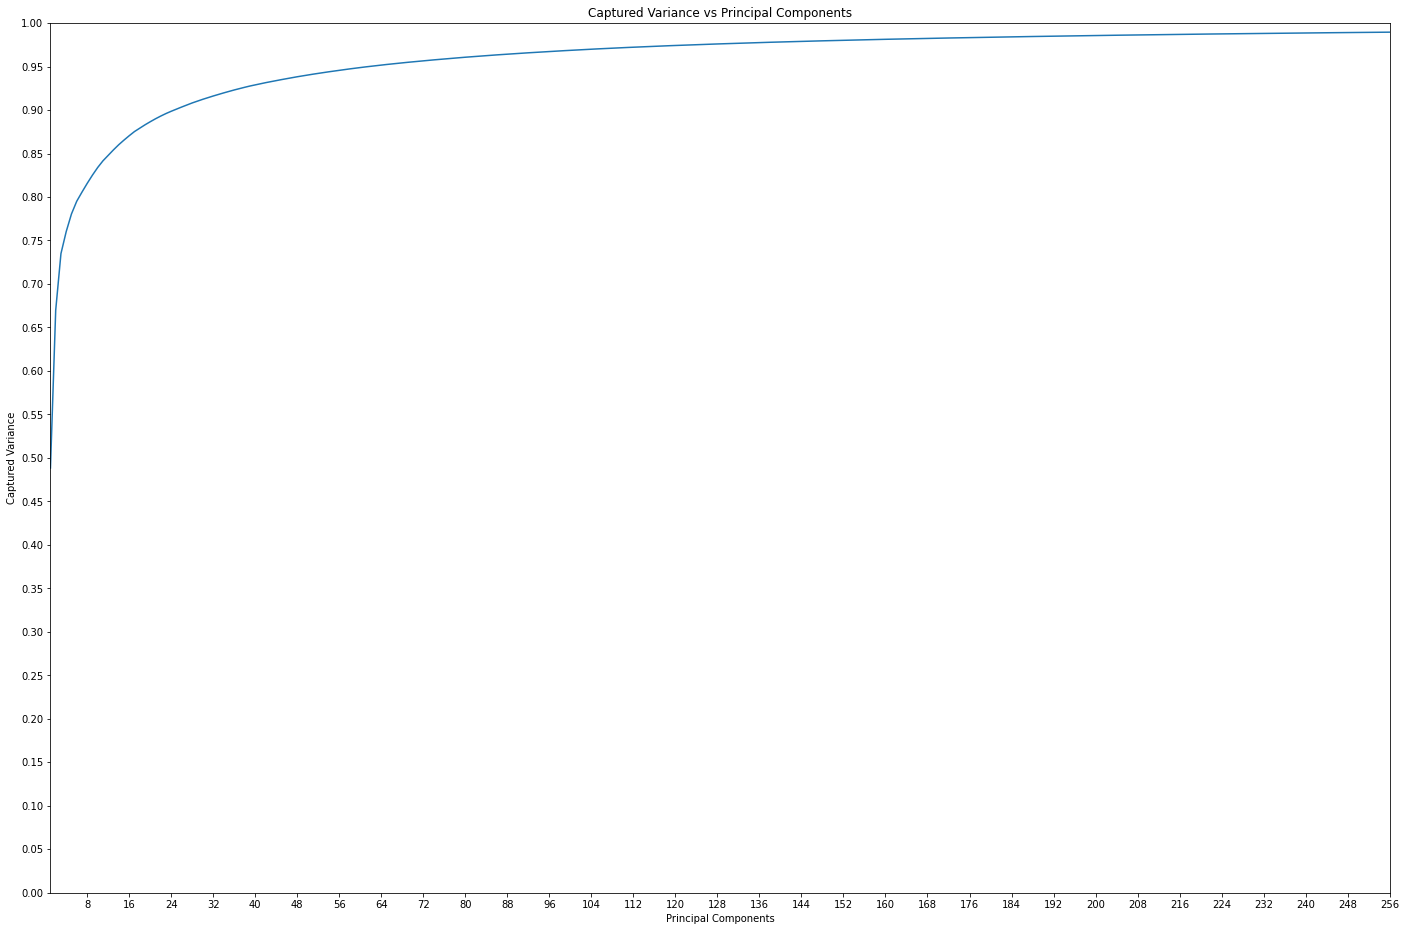

In [42]:
# m = # of data = number of cols in X_train = dimension of D
m = X_train.shape[1]

# Calculate the total variance = 1/m \sum over m (singular values^2)
total_var = (1/m) * (np.sum(np.square(D)))

# calculate the captured variance = 1/m \sum over d (singular values^2)
# Takes an array of all possible d principal components as input
# Outputs array of all captured variance for each d principal components
def captured_var(d): 
  var_arr = np.zeros(256)
  for i in d: 
    var_arr[i - 1] = (1/m) * (np.sum(np.square(D)[0:i])) / total_var
  return var_arr

# x-axis are all the d principal components, y the corresponding captured variance
x = np.arange(1, 257)
y = captured_var(x)

# labels and sizing
plt.title("Captured Variance vs Principal Components") 
plt.xlabel("Principal Components") 
plt.ylabel("Captured Variance") 
plt.rcParams["figure.figsize"] = (24,16)
plt.xticks(np.arange(0, 257, step=8))
plt.yticks(np.arange(0, 1.05, step=0.05))
plt.xlim(1, 256)
plt.ylim(0, 1)
plt.plot(x,y) 
plt.show()

1c) Use you plot from part 1b) to answer the following questions:   
[i] To the nearest 5%, what fraction of total variance is captured by the first principal component? ANS: 50%

[ii] To the nearest power of 2, how many PC's are required to capture 95% of the total variance? ANS: 64

2) Project the full data $X$ onto the first $d$ principal components for $d = 8,16,32,64,128,256$. Display the approximate faces for the same images from part 1) in a 5 x 8 tile. Remember to add back the mean before displaying the image.


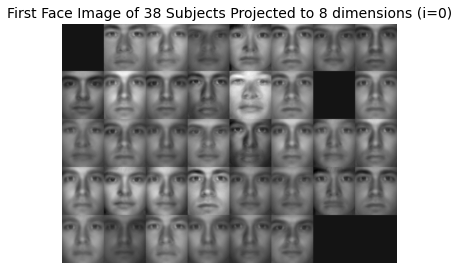

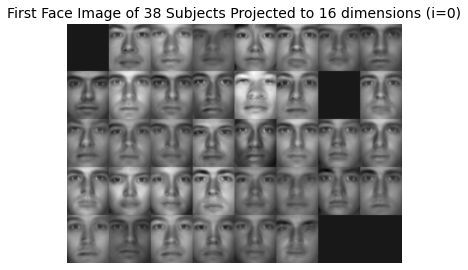

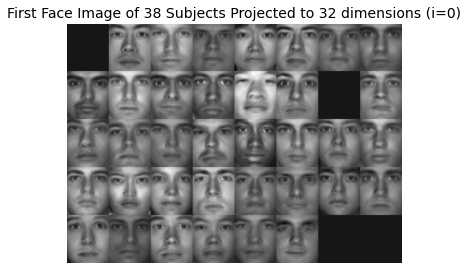

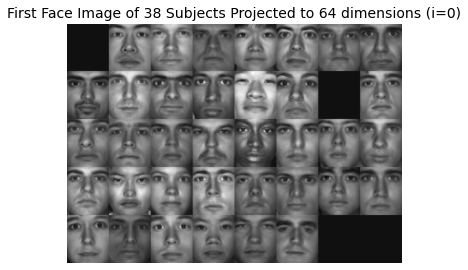

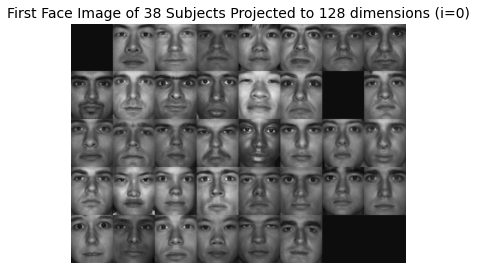

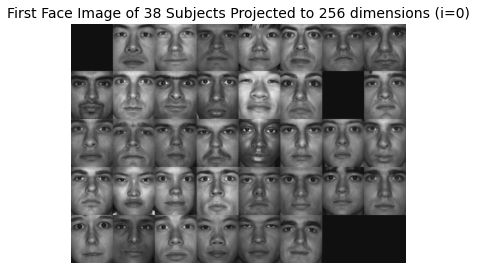

In [30]:
# Project the data onto the selected principal components
UT = np.transpose(U)

# turn the array of singular values D into diagonal array
sigma = np.zeros((512, 512))
for i in range(512):
  sigma[i, i] = D[i]


for d in [8, 16, 32, 64, 128, 256]:
  # Calculating the d-dim projection = U_d \sigma_d VT_d
  Ud = np.transpose(UT[0:d])
  Cd = sigma[0:d, 0:d]
  VTd = VT[0:d]

  # perform the matrix multiplication and add mean back
  center_proj = np.matmul(np.matmul(Ud, Cd), VTd)
  proj = np.transpose((np.transpose(center_proj) + mu))
  
  # Faceboard of 38 faces (taken from ECE_4/535_codebase_ramadge and modified)
  faceIdx = 0 # index of face to display for each subject
  Bh, Bw = 5, 8
  FB = np.zeros((Bh*nr, Bw*nc))
  for i in range(nFc):
      if nImg[i]>0:
          loc = np.where(Y_train==i)[0]
          x = proj[:,loc[faceIdx]]
          A = unpackcw(x,nr)
          row, col = divmod(i,Bw)
          rpt, cpt = row*nr, col*nc
          FB[rpt:rpt+nr, cpt:cpt+nc] = A
  plt.figure(figsize = (6,6))
  plt.imshow(FB, cmap='gray')
  plt.axis('off')
  plt.title("First Face Image of 38 Subjects Projected to " + str(d) + " dimensions (i=%i)" %faceIdx, fontsize=14)
  plt.show()

### Part II: SVM Classification

3） To test the effectiveness of PCA dimensionality reduction train a binary 
linear support vector machine (SVM) to classify **subject 0** versus **subject 1**, using PCA  projected training data. 

You do not need to know (yet) how the SVM works. We will cover that later. What is important for now is that it is a binary classifer with one hyperparameter $C>0$.
The first thing we need to do is select $C$. To do that project the centered training data and testing data onto the first 128 principal components of the centered training data. Then use this data to plot training accuracy vs $C$.


**Note:** Output data matrix should be 128 x N for both the training data and the testing data (in the reduced dimension).

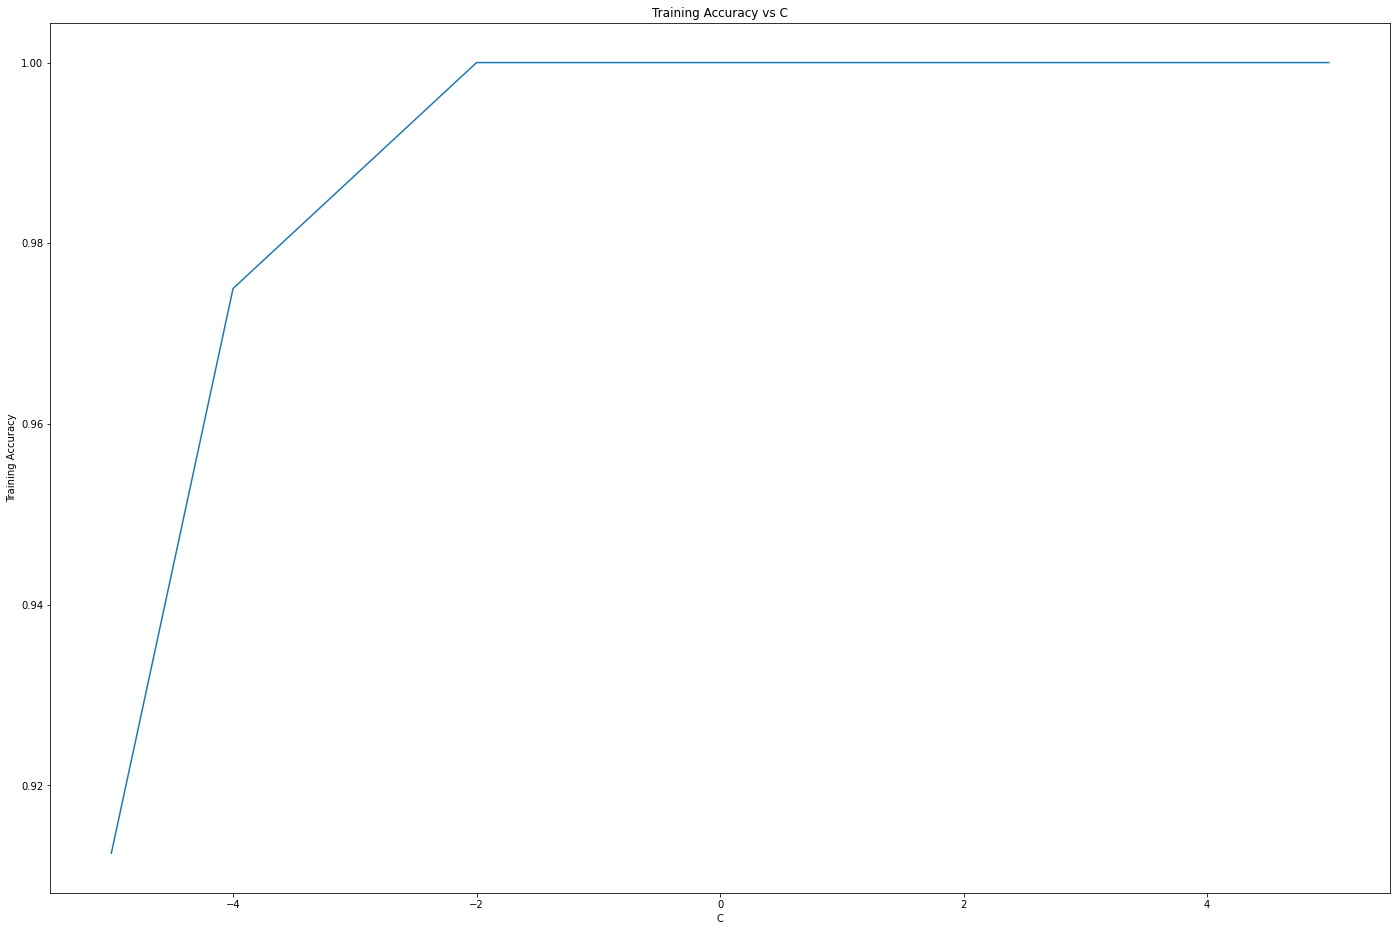

In [44]:
# Project the centered training data and testing data onto 
# the first 128 principal components of the centered training data.

# project centered training data to first 128 principal components
Cd = sigma[0:128, 0:128]
VTd = VT[0:128]
proj_train = np.matmul(Cd, VTd)

# project testing data to centered training data
test_center = np.transpose((np.transpose(X_test) - mu))
proj_test = np.matmul(np.transpose(Ud), test_center)

# Form the training data using subjects 0, 1

# binary_train contains the first 80 pictures
# binary_train_label classifies each as 0 or 1
binary_train = np.transpose(np.transpose(proj_train)[0:80])
binary_train_label = Y_train[0:80]


# THIS PORTION OF CODE IS GIVEN TO YOU ----- uncomment to use
C_list = np.arange(-5,6)
accuracy_list = []
for C in C_list:
   svm_binary = svm.SVC(kernel='linear',C=10.0**C)
   svm_binary.fit(binary_train.T,binary_train_label)

   binary_train_pred = svm_binary.predict(binary_train.T)

   accuracy = np.sum(binary_train_pred==binary_train_label)/float(len(binary_train_pred))
   accuracy_list.append(accuracy)
# -----

# Now plot the training accuracy vs C    
x = np.arange(-5, 6)
y = accuracy_list
plt.title("Training Accuracy vs C") 
plt.xlabel("C") 
plt.ylabel("Training Accuracy") 
plt.rcParams["figure.figsize"] = (24,16)
plt.plot(x,y) 
plt.show()


4）Based on the graph you obtain above select a reasonable value for $C$.
(e.g. something like $C = 10^{-2}$):

Now repeat 4) for projected training data onto $d$ principal components where $d = 8,16,32,64,128,256,512$. This time plot both the training and testing accuracy vs. $d$. Use similar ticks marks for the x and y axies as in part 4).

What do you observe? How small a dimension can you select for the projection and a still obtain > 95% training and test accuracy **ANS:** 8

**Note:** In practice, we pick $d$ by measuring performance on a validation dataset. In addition, for each $d$ we would normally do a larger sweep of the hyperparameter $C$.

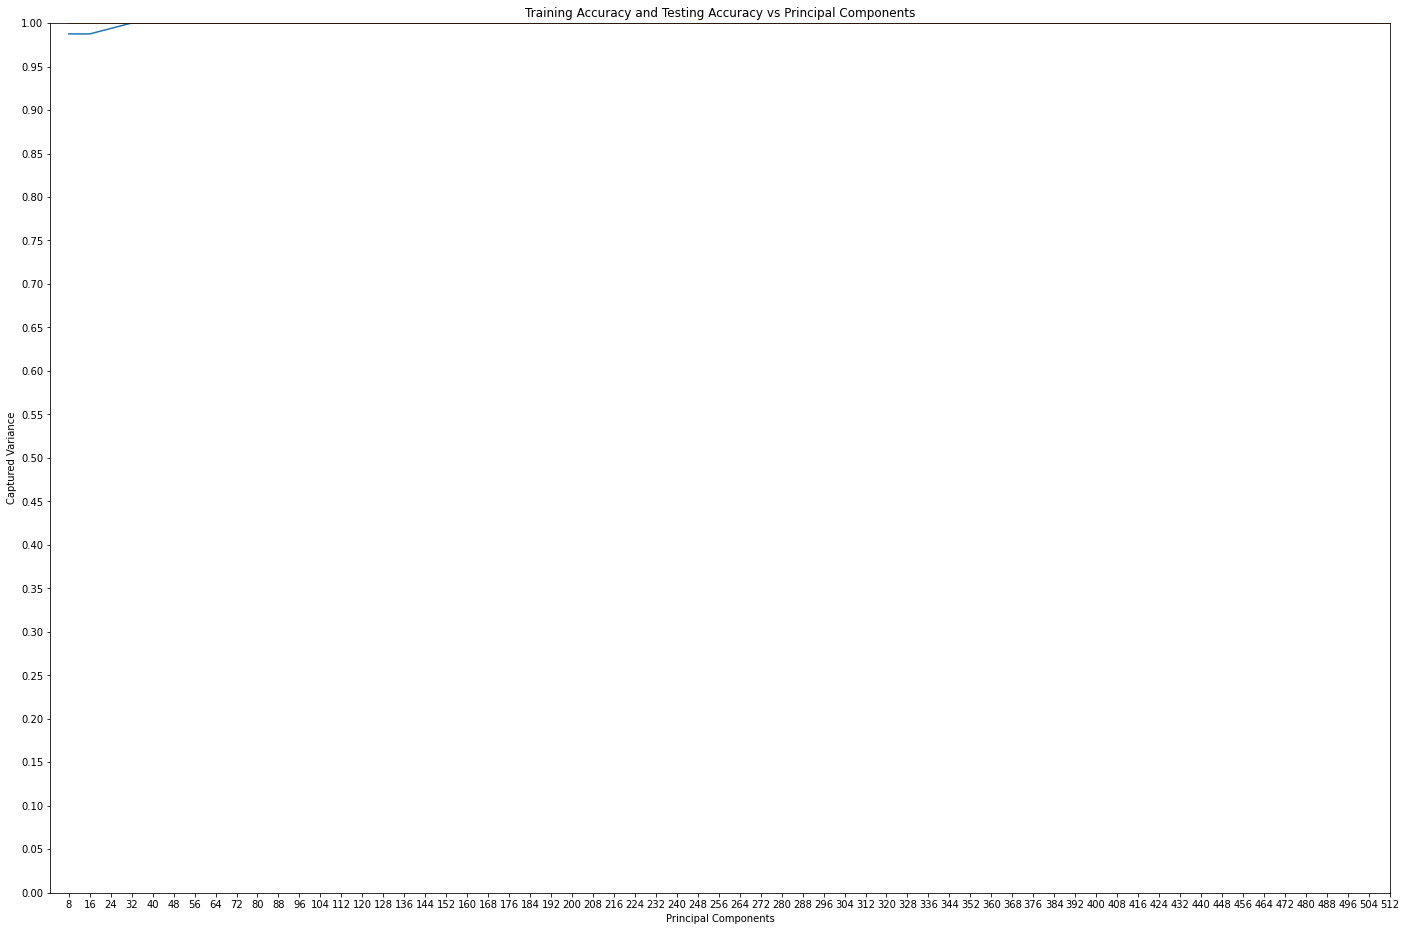

In [45]:
accuracy_list_train = []
accuracy_list_test = []

for d in [8, 16, 32, 64, 128, 256, 512]:
  # Calculating the d-dim coords and creating training set for 0, 1
  Cd = sigma[0:d, 0:d]
  VTd = VT[0:d]
  proj_train = np.matmul(Cd, VTd)
  binary_train = np.transpose(np.transpose(proj_train)[0:80])
  binary_train_label = Y_train[0:80]

  # training accuracy
  svm_binary = svm.SVC(kernel='linear',C=10.0**(-2))
  svm_binary.fit(binary_train.T,binary_train_label)

  binary_train_pred = svm_binary.predict(binary_train.T)

  accuracy_train = np.sum(binary_train_pred==binary_train_label)/float(len(binary_train_pred))
  accuracy_list_train.append(accuracy_train)

for d in [8, 16, 32, 64, 128, 256, 512]:
  # Calculating d-dim coords and creating testing set for 0, 1
  test_center = np.transpose((np.transpose(X_test) - mu))
  proj_test = np.matmul(np.transpose(Ud), test_center)
  binary_test = np.transpose(np.transpose(proj_test)[0:80])
  binary_test_label = Y_test[0:80] 

  # testing accuracy
  svm_binary = svm.SVC(kernel='linear',C=10.0**(-2))
  svm_binary.fit(binary_test.T,binary_test_label)

  binary_test_pred = svm_binary.predict(binary_test.T)

  accuracy_test = np.sum(binary_test_pred==binary_test_label)/float(len(binary_test_pred))
  accuracy_list_test.append(accuracy_test)


x = [8, 16, 32, 64, 128, 256, 512]
y = accuracy_list_train
z = accuracy_list_test

# labels and sizing
plt.title("Training Accuracy and Testing Accuracy vs Principal Components") 
plt.xlabel("Principal Components") 
plt.ylabel("Captured Variance") 
plt.rcParams["figure.figsize"] = (24,16)
plt.xticks(np.arange(0, 513, step=8))
plt.yticks(np.arange(0, 1.05, step=0.05))
plt.xlim(1, 512)
plt.ylim(0, 1)
plt.plot(x,y)
plt.plot(x,z) 
plt.show()